В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [2]:
cars_df = pd.read_csv('cars.csv')

In [3]:
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [4]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
?pd.DataFrame.info

Signature:
pd.DataFrame.info(
    self,
    verbose: 'bool | None' = None,
    buf: 'WriteBuffer[str] | None' = None,
    max_cols: 'int | None' = None,
    memory_usage: 'bool | str | None' = None,
    show_counts: 'bool | None' = None,
) -> 'None'
Docstring:
Print a concise summary of a DataFrame.

This method prints information about a DataFrame including
the index dtype and columns, non-null values and memory usage.

Parameters
----------
verbose : bool, optional
    Whether to print the full summary. By default, the setting in
    ``pandas.options.display.max_info_columns`` is followed.
buf : writable buffer, defaults to sys.stdout
    Where to send the output. By default, the output is printed to
    sys.stdout. Pass a writable buffer if you need to further process
    the output.
max_cols : int, optional
    When to switch from the verbose to the truncated output. If the
    DataFrame has more than `max_cols` columns, the truncated output
    is used. By default, the setting in


In [5]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [6]:
cars_df.select_dtypes(include='object')

,Brand,Model,Fuel_Type,Transmission,Owner_Type
0,Toyota,Corolla,Petrol,Manual,First
1,Honda,Civic,Petrol,Automatic,Second
2,Ford,Mustang,Petrol,Automatic,First
3,Maruti,Swift,Diesel,Manual,Third
4,Hyundai,Sonata,Diesel,Automatic,Second
...,...,...,...,...,...
95,Mercedes,C-Class,Diesel,Automatic,First
96,Toyota,Innova Crysta,Diesel,Manual,Second
97,Ford,EcoSport,Petrol,Manual,Third
98,Hyundai,Verna,Petrol,Automatic,Second


In [7]:
for column in list(cars_df.select_dtypes(include='object').columns.values):
    print(f'{column}: ', eval(f'cars_df.{column}.unique()'), '\n')

Brand:  ['Toyota' 'Honda' 'Ford' 'Maruti' 'Hyundai' 'Tata' 'Mahindra' 'Volkswagen'
 'Audi' 'BMW' 'Mercedes'] 

Model:  ['Corolla' 'Civic' 'Mustang' 'Swift' 'Sonata' 'Nexon' 'Scorpio' 'Polo'
 'A4' 'X1' 'C-Class' 'Endeavour' 'Creta' 'Harrier' 'Ertiga' 'City'
 'Tiguan' 'Q3' '5 Series' 'GLC' 'Innova' 'Figo' 'Verna' 'Altroz' 'Thar'
 'Passat' 'A6' 'X3' 'E-Class' 'Fortuner' 'Aspire' 'Elantra' 'Safari'
 'Vitara' 'WR-V' 'Ameo' 'A3' '7 Series' 'GLE' 'Yaris' 'Ranger' 'Santro'
 'Tigor' 'S-Cross' 'BR-V' 'T-Roc' 'Q7' 'X5' 'GLA' 'Camry' 'Venue' 'Tiago'
 'XUV300' 'Vento' 'A5' '3 Series' 'Innova Crysta' 'EcoSport'] 

Fuel_Type:  ['Petrol' 'Diesel'] 

Transmission:  ['Manual' 'Automatic'] 

Owner_Type:  ['First' 'Second' 'Third'] 



In [8]:
cars_df.describe()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,50.500000,2018.39000,28150.000000,17.210000,1855.230000,158.130000,5.230000,1.574000e+06
std,29.011492,1.17116,9121.375716,3.309902,631.311475,76.968137,0.750151,1.000265e+06
min,1.000000,2016.00000,10000.000000,10.000000,999.000000,68.000000,4.000000,4.500000e+05
25%,25.750000,2017.75000,22000.000000,15.000000,1462.000000,103.000000,5.000000,7.000000e+05
50%,50.500000,2018.00000,27000.000000,17.000000,1774.000000,148.000000,5.000000,1.300000e+06
75%,75.250000,2019.00000,32000.000000,19.000000,2143.000000,187.000000,5.000000,2.500000e+06
max,100.000000,2021.00000,60000.000000,25.000000,4951.000000,396.000000,7.000000,4.000000e+06


**В наборі даних 13 колонок, з яких:**
* 8 числових колонок, які описують експлуатацію автомобіля, пробіг, вік, ціна, кількість місць, тощо.
* 5 колонок типу object, детальніше пройдемося по кожній змінній: 
> **Brand:** колонка мультикатегоріальних значень, що означає марку автомобіля, без відношення порядку<br><br>
> **Model:** колонка мультикатегоріальних значень, що означає модель автомобіля, без відношення порядку<br><br>
> **Fuel_Type:** колонка бінарних значень, може бути або дизельний двигун, або бензиновий<br><br>
> **Transmission:** колонка бінарних значень,означає тип коробки передач (автомат або механіка)<br><br>
> **Owner_Type:** колонка мультикатегоріальних значень з відношенням порядку (First > Second > Third)<br><br>

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(cars_df.loc[:, cars_df.columns != 'Price'], cars_df['Price'], test_size=0.2, random_state=12)

In [10]:
X_train.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5


In [11]:
y_train.head()

83    1600000
55    2600000
26    3200000
54     650000
19    2500000
Name: Price, dtype: int64

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [12]:
fuel_type_map = {'Petrol': 0, 'Diesel': 1}
transmission_map = {'Manual': 0, 'Automatic': 1}

X_train['Fuel_Type_Codes'] = X_train['Fuel_Type'].map(fuel_type_map)
X_train['Transmission_Codes'] = X_train['Transmission'].map(transmission_map)

X_test['Fuel_Type_Codes'] = X_test['Fuel_Type'].map(fuel_type_map)
X_test['Transmission_Codes'] = X_test['Transmission'].map(transmission_map)

Для бінарних змінних, `fuel_type` та `transmission` робимо прості перетворення, кожне значення змінної відповідатиме конкретному числу

In [13]:
display(X_train.head(), X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Codes,Transmission_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,0,1
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,1,1
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,0,1
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0,0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,0,1


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Codes,Transmission_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,0,1
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,0,0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0,0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,0,0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,0,0


In [14]:
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer

brand_one_hot_encoder = OneHotEncoder()
brand_one_hot_encoder.fit(X_train[['Brand']])

X_train[brand_one_hot_encoder.categories_[0]] = brand_one_hot_encoder.transform(X_train[['Brand']]).toarray()
X_test[brand_one_hot_encoder.categories_[0]] = brand_one_hot_encoder.transform(X_test[['Brand']]).toarray()

In [15]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Змінна `owner_type` є мультикатегоріальною із порядком, `OrdinalEncoder` дозволяє здійснити кодування зі збереженням порядковості

In [16]:
# case 1
# за змінною model закріплюємо середнє значеня по моделі
## якщо такої моделі немає - середнє по бренду
## якщо такого бренду немає - середнє по усім (95 перцентиль)

# case 2
# за змінною model робимо розбиття на 5 груп
## автомобілі від ... до ... і таких 5 груп за зростанням
## якщо модель відсутня - undefined (NaN)

def mean_by_brand_and_model(df, model_name):
    grouped_mean_brand_model = df.groupby(['Brand', 'Model'])['Price'].mean()
    if model_name in list(df['Model'].unique()):
        return grouped_mean_brand_model.loc[:, model_name].values[0]
    else:
        return False

def mean_by_brand(df, brand_name):
    grouped_mean_brand = df.groupby(['Brand'])['Price'].mean()
    if brand_name in list(df['Brand'].unique()):
        print(True)
        print(grouped_mean_brand)
        return grouped_mean_brand.loc[brand_name]
    else:
        return False

def mean_by_total_95_percentile(df):
    grouped_mean = df['Price'][df['Price'] < df['Price'].quantile(0.95)].mean()
    return grouped_mean

X_train['Model_Average_Case_1'] = X_train.apply(
    lambda x: mean_by_brand_and_model(cars_df, x['Model']) 
    if x['Model'] in list(cars_df['Model'].unique()) else (
        mean_by_brand(cars_df, x['Brand']) 
        if x['Brand'] in list(cars_df['Brand'].unique()) else 
        mean_by_total_95_percentile(df)
    ),
    axis=1
)
X_test['Model_Average_Case_1'] = X_test.apply(
    lambda x: mean_by_brand_and_model(cars_df, x['Model']) 
    if x['Model'] in list(cars_df['Model'].unique()) else (
        mean_by_brand(cars_df, x['Brand']) 
        if x['Brand'] in list(cars_df['Brand'].unique()) else 
        mean_by_total_95_percentile(df)
    ),
    axis=1
)

# 1 case
enc_bin_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform', subsample=None)
enc_bin_discretizer.fit(X_train[['Model_Average_Case_1']])
X_train['Model_Average_Case_1'] = enc_bin_discretizer.transform(X_train[['Model_Average_Case_1']])
X_test['Model_Average_Case_1'] = enc_bin_discretizer.transform(X_test[['Model_Average_Case_1']])


# 2 case
X_train['Model_Average_Case_2'] = X_train['Brand'].apply(lambda x: cars_df.groupby(['Brand'])['Price'].mean().loc[x])
X_test['Model_Average_Case_2'] = X_test['Brand'].apply(lambda x: cars_df.groupby(['Brand'])['Price'].mean().loc[x])

enc_bin_discretizer.fit(X_train[['Model_Average_Case_2']])
X_train['Model_Average_Case_2'] = enc_bin_discretizer.transform(X_train[['Model_Average_Case_2']])
X_test['Model_Average_Case_2'] = enc_bin_discretizer.transform(X_test[['Model_Average_Case_2']])


Отже, запропоновано 2 варіанти заповнення колонки `Model`.
* Перший варіант - визначення середнього значення за моделлю, якщо модель відсутня - за маркою, якщо і марка відсутня - за усією колонкою.
* Другий варіант - визначення середнього значення за маркою автомобіля.

Збережемо в обидві колонки `Model_Average_Case_2` та `Model_Average_Case_1` та потім оберемо кращий варіант.

Очікуваний результат після трансформацій:

In [17]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Codes,Transmission_Codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_Average_Case_1,Model_Average_Case_2
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,4.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Codes,Transmission_Codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_Average_Case_1,Model_Average_Case_2
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

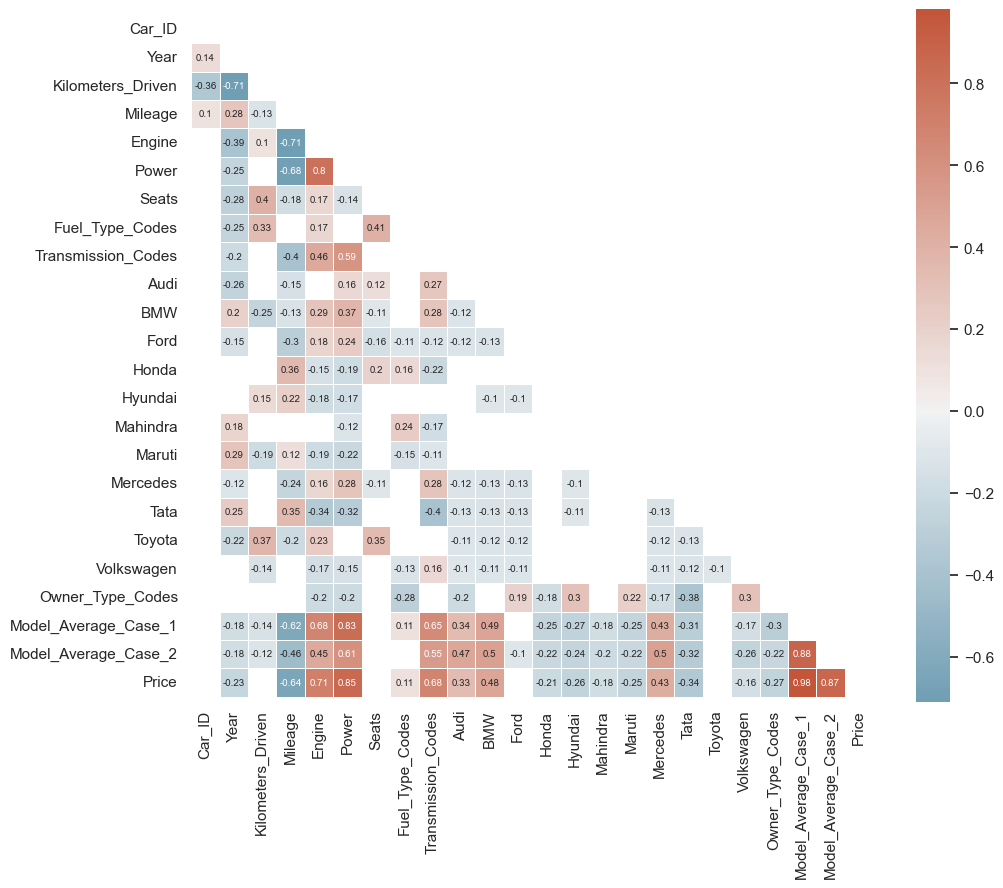

In [18]:
correlations_X_train = pd.concat([X_train.select_dtypes(['int', 'float']), y_train], axis=1).corr()

sns.set_theme(style="white")

mask = np.triu(np.ones_like(correlations_X_train, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(correlations_X_train[(abs(correlations_X_train) >= 0.1) & (abs(correlations_X_train) <= 0.999)], cmap=cmap, center=0, mask=mask, 
            square=True, linewidths=.5, cbar_kws={"shrink": 1.0}, annot_kws={"size": 7}, annot=True)

plt.show()

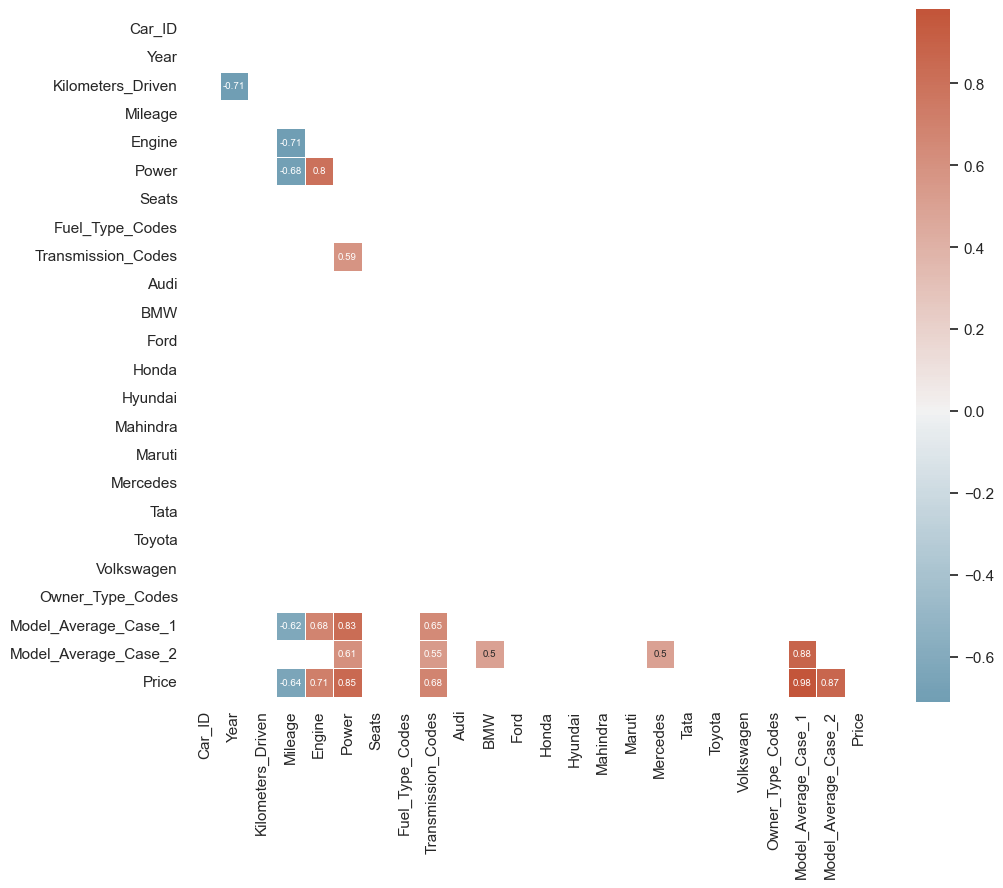

In [19]:
correlations_X_train = pd.concat([X_train.select_dtypes(['int', 'float']), y_train], axis=1).corr()

sns.set_theme(style="white")

mask = np.triu(np.ones_like(correlations_X_train, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(correlations_X_train[(abs(correlations_X_train) >= 0.5) & (abs(correlations_X_train) <= 0.999)], cmap=cmap, center=0, mask=mask, 
            square=True, linewidths=.5, cbar_kws={"shrink": 1.0}, annot_kws={"size": 7}, annot=True)

plt.show()

Відповідно до кореляційної матриці, бачимо що колонка `Mileage` негативно корелює з `Price`. Колонки `Engine`, `Power`, `Transmission Codes`, `Model Average Case 1`, `Model Average Case 2` позитивно корелюють до `Price`. 

`Kilomoters Driven`, `Mileage` негативно корелюють з усіма змінними. 

Помітив сильну кореляцію між змінною `Model Average Case 1`, тобто така зміна може привести до мультиколінеарності та зменшенні ефективності моделі. Зробимо 2 варіанти моделі, з кейсом 1 та з кейсом 2. Для першого кейсу з кореляцією **0.98** між змінною `Model Average Case 1` та `Price` використаємо **Ridge регресію**.

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [20]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import root_mean_squared_error, r2_score

# case 1
X_train_case_1 = X_train.loc[:, (X_train.columns != 'Model_Average_Case_2') & (X_train.columns != 'Car_ID')].select_dtypes(['int', 'float'])
X_test_case_1 = X_test.loc[:, (X_test.columns != 'Model_Average_Case_2') & (X_train.columns != 'Car_ID')].select_dtypes(['int', 'float'])

model_1 = LinearRegression()
model_1.fit(X_train_case_1, y_train)

print("Train RMSE: ", root_mean_squared_error(y_train, model_1.predict(X_train_case_1)))
print("Test RMSE: ", root_mean_squared_error(y_test, model_1.predict(X_test_case_1)), '\n')


# case 2
X_train_case_2 = X_train.loc[:, X_train.columns != 'Model_Average_Case_1'].select_dtypes(['int', 'float'])
X_test_case_2 = X_test.loc[:, X_test.columns != 'Model_Average_Case_1'].select_dtypes(['int', 'float'])

model_2 = LinearRegression()
model_2.fit(X_train_case_2, y_train)

print("Train RMSE: ", root_mean_squared_error(y_train, model_2.predict(X_train_case_2)))
print("Test RMSE: ", root_mean_squared_error(y_test, model_2.predict(X_test_case_2)))
# X_train

Train RMSE:  144369.7778414975
Test RMSE:  188864.5012046621 

Train RMSE:  210293.57828151862
Test RMSE:  258181.5611203271


In [21]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_case_1, y_train)

print("Train RMSE: ", root_mean_squared_error(y_train, ridge.predict(X_train_case_1)))
print("Test RMSE: ", root_mean_squared_error(y_test, ridge.predict(X_test_case_1)))

Train RMSE:  145876.0903435725
Test RMSE:  168656.3560538867


**Висновок:** отже, перший варіант моделі лінійної регресії має найменшу помилку RMSE на тренувальних даних (Case 1), проте на тестових має більшу помилку, ніж в Ridge регресії. Другий варіант лінійної регресії (Case 2) має значно більшу помилку ніж Ridge регресія. Тобто наразі зупиняємось на тому, що Ridge регресія для 1 кейсу є найкращою.

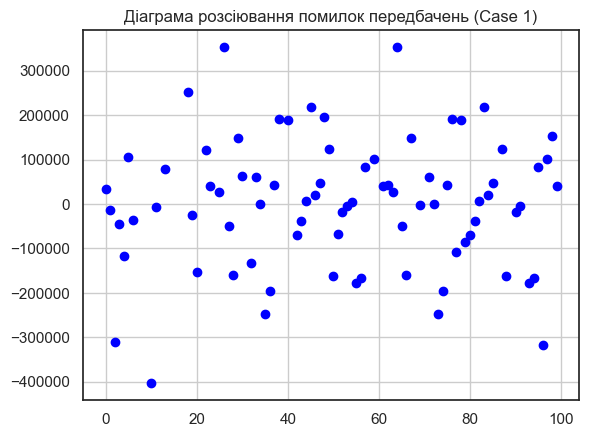

In [22]:
plt.plot(y_train - model_1.predict(X_train_case_1), 'o', color='blue')
plt.grid()
plt.title("Діаграма розсіювання помилок передбачень (Case 1)")
plt.show()

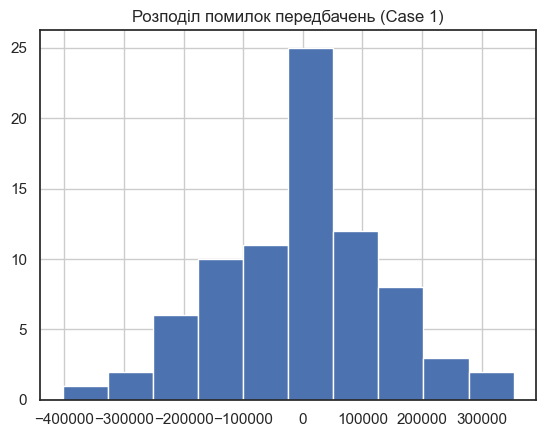

In [23]:
plt.hist(y_train - model_1.predict(X_train_case_1))
plt.grid()
plt.title("Розподіл помилок передбачень (Case 1)")
plt.show()

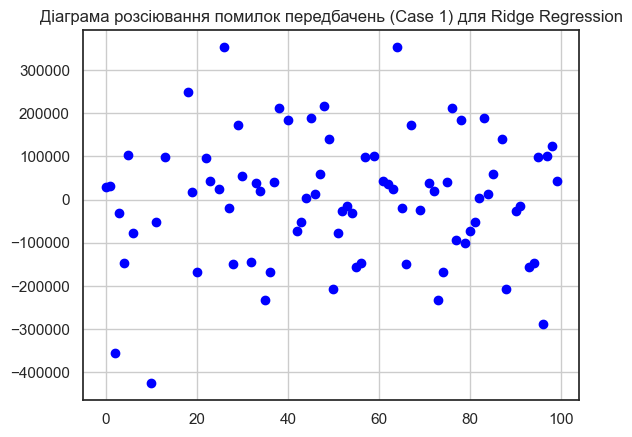

In [24]:
plt.plot(y_train - ridge.predict(X_train_case_1), 'o', color='blue')
plt.grid()
plt.title("Діаграма розсіювання помилок передбачень (Case 1) для Ridge Regression")
plt.show()

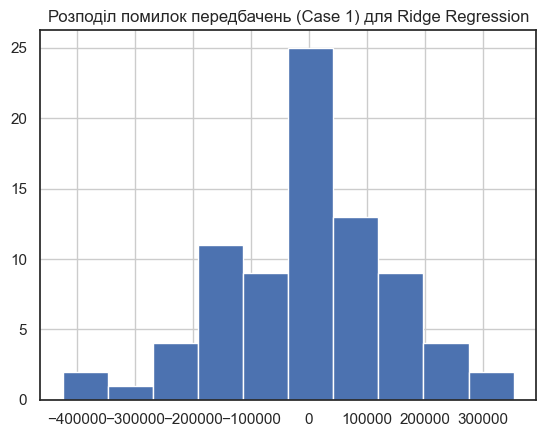

In [25]:
plt.hist(y_train - ridge.predict(X_train_case_1))
plt.grid()
plt.title("Розподіл помилок передбачень (Case 1) для Ridge Regression")
plt.show()

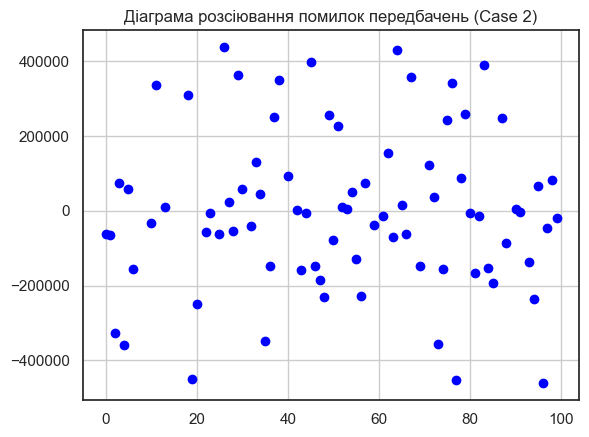

In [26]:
plt.plot(y_train - model_2.predict(X_train_case_2), 'o', color='blue')
plt.grid()
plt.title("Діаграма розсіювання помилок передбачень (Case 2)")
plt.show()

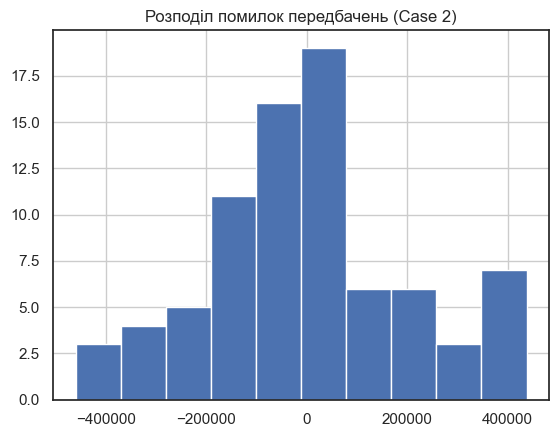

In [27]:
plt.hist(y_train - model_2.predict(X_train_case_2))
plt.grid()
plt.title("Розподіл помилок передбачень (Case 2)")
plt.show()

Помічаємо гомоскедастичність у всіх випадках, проте найбільш цікавим випадком для нас є результати Ridge Regression, оскільки саме вона показала найменше значення помилки RMSE. Розподіл помилок для Ridge Regression приблизно є нормальним, присутнє зміщення лівих бінів, проте не значно. Тому припускаємо, що розподіл є нормальним. 

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [28]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']

scaler_1 = StandardScaler()
scaler_1.fit(X_train_case_1[columns_to_scale])
scaled_inputs_1 = scaler_1.transform(X_train_case_1[columns_to_scale])

# pd.concat scaled_inputs
inputs_case_1 = np.concatenate((scaled_inputs_1, X_train_case_1.loc[:, list(set(X_train_case_1.columns).difference(set(columns_to_scale)))]), axis=1)
model_1.fit(inputs_case_1, y_train)

print("Train RMSE (Case 1): ", root_mean_squared_error(y_train, model_1.predict(inputs_case_1)))

scaler_ridge = StandardScaler()
scaler_ridge.fit(X_train_case_1[columns_to_scale])
scaled_inputs_ridge = scaler_ridge.transform(X_train_case_1[columns_to_scale])

inputs_case_ridge = np.concatenate((scaled_inputs_ridge, X_train_case_1.loc[:, list(set(X_train_case_1.columns).difference(set(columns_to_scale)))]), axis=1)
ridge.fit(inputs_case_ridge, y_train)

print("Train RMSE (Case 1) Ridge Regression: ", root_mean_squared_error(y_train, ridge.predict(inputs_case_ridge)))

scaler_2 = StandardScaler()
scaler_2.fit(X_train_case_2[columns_to_scale])
scaled_inputs_2 = scaler_2.transform(X_train_case_2[columns_to_scale])

# pd.concat scaled_inputs
inputs_case_2 = np.concatenate((scaled_inputs_2, X_train_case_2.loc[:, list(set(X_train_case_2.columns).difference(set(columns_to_scale)))]), axis=1)
model_2.fit(inputs_case_2, y_train)

print("Train RMSE (Case 2): ", root_mean_squared_error(y_train, model_2.predict(inputs_case_2)))

Train RMSE (Case 1):  144369.77784149852
Train RMSE (Case 1) Ridge Regression:  146038.45227148084
Train RMSE (Case 2):  210293.5782815185


В даному випадку бачимо, що масштабування даних покращило лише результат Ridge регресії, для обох моделей лінійної регресії значення помилки RMSE для тестових даних не змінилося. Так як Ridge регресія виявилась найкращою, оберемо її для подальших завдань.

In [29]:
weights_df = pd.DataFrame({
    "features": (np.append(columns_to_scale + list(set(X_train_case_1.columns).difference(set(columns_to_scale))), 1)),
    "weights": np.append(ridge.coef_, ridge.intercept_)
})
weights_df.sort_values(by='weights', ascending=False)

,features,weights
21,1,806903.277389
6,Model_Average_Case_1,548345.423697
4,Power,190034.257239
8,Mercedes,132691.423834
14,BMW,117160.366307
16,Transmission_Codes,116943.791003
10,Toyota,97712.158878
12,Audi,84432.124445
9,Honda,81810.172399
19,Owner_Type_Codes,63277.373801


Отже, найвпливовішими коефіцієнтами є константа та значення середньої вартості автомобіля за моделлю. Інші коефіцієнти потужності двигуна, марка **Mercedes**, **BMW**, тип коробки передач є менш впливовими, проте більші за інших. Тобто, можемо сказати, що мерседеси та бмв є дорожчими автомобілями, так як при, якщо 1 стоятиме біля цих коефіцієнтів, це напряму впливатиме на вартість автівки. 

Бачимо, що **Ford**, **Hyuindai**, **Volkswagen**, **Mahindra**, **Maruti** мають від'ємні коефіцієнти, тобто якщо автомобіль буде однією з цих марок - ціна автомобіля буде зменшуватися. Це досить логічно, так як ці марки є бюджетнішими, тому біля їх стоять від'ємні коефіцієнти.

Нелогічним здається те, що потужність двигуна (`Engine`) та рік випуску авто (`Year`) мають негативні коефіцієнти. Що більший рік випуску авто, тим більша ціна даного автомобіля, так само з двигуном, що потужніший двигун - то дорожчий повинен бути автомобіль.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [30]:
import statsmodels.api as sm

Y = y_train.reset_index(drop=True)
X = pd.DataFrame(inputs_case_ridge, columns=columns_to_scale + list(set(X_train_case_1.columns).difference(set(columns_to_scale))))
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()

results.params

const                   720035.379708
Year                    -36088.836121
Kilometers_Driven       -25616.118830
Mileage                 -45195.084219
Engine                  -39052.485299
Power                   217037.256944
Seats                    15345.045499
Model_Average_Case_1    526232.923350
Fuel_Type_Codes         100074.654092
Mercedes                229283.998004
Honda                   185478.882873
Toyota                  203684.808224
Ford                   -171383.276823
Audi                    199276.785726
Hyundai                -109267.352150
BMW                     204749.899137
Volkswagen              -37348.562000
Transmission_Codes      119867.946822
Mahindra                -43558.609377
Maruti                  -23370.006837
Owner_Type_Codes         98237.240093
Tata                     82488.812931
dtype: float64

In [31]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     148.3
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           5.63e-43
Time:                        19:40:03   Log-Likelihood:                -1063.9
No. Observations:                  80   AIC:                             2170.
Df Residuals:                      59   BIC:                             2220.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   7.2e+05    7.9e+04      9.113      0.000    5.62e+05    8.78e+05
Year                 -3.609e+04   4.02e+04     -0.897      0.373   -1.17e+05    4.44e+04
Kilometers_Driven    -2.562e+04      4e+04     -0.640      0.524   -1.06e+05    5.44e+04
Mileage               -4.52e+04   4.14e+04     -1.091      0.280   -1.28e+05    3.77e+04
Engine               -3.905e+04   4.82e+04     -0.811      0.421   -1.35e+05    5.73e+04
Power                  2.17e+05   6.09e+04      3.563      0.001    9.51e+04    3.39e+05
Seats                 1.535e+04    2.9e+04      0.529      0.599   -4.27e+04    7.34e+04
Model_Average_Case_1  5.262e+05   6.47e+04      8.139      0.000    3.97e+05    6.56e+05
Fuel_Type_Codes       1.001e+05      7e+04      1.429      0.158   -4.01e+04     2.4e+05
Mercedes              2.293e+05   1.03e+05      2.218      0.030    2.24e+04    4.36e+05
Honda                 1.855e+05   9.91e+04      1.872      0.066   -1.28e+04    3.84e+05
Toyota                2.037e+05   7.42e+04      2.745      0.008    5.52e+04    3.52e+05
Ford                 -1.714e+05   7.54e+04     -2.272      0.027   -3.22e+05   -2.05e+04
Audi                  1.993e+05   1.08e+05      1.839      0.071   -1.76e+04    4.16e+05
Hyundai              -1.093e+05   8.36e+04     -1.307      0.196   -2.77e+05     5.8e+04
BMW                   2.047e+05   1.06e+05      1.930      0.058   -7555.503    4.17e+05
Volkswagen           -3.735e+04   7.62e+04     -0.490      0.626    -1.9e+05    1.15e+05
Transmission_Codes    1.199e+05   6.23e+04      1.925      0.059   -4704.440    2.44e+05
Mahindra             -4.356e+04   1.05e+05     -0.415      0.680   -2.53e+05    1.66e+05
Maruti               -2.337e+04   8.66e+04     -0.270      0.788   -1.97e+05     1.5e+05
Owner_Type_Codes      9.824e+04   4.96e+04      1.979      0.052   -1067.780    1.98e+05
Tata                  8.249e+04   8.01e+04      1.030      0.307   -7.78e+04    2.43e+05
==============================================================================
Omnibus:                        1.040   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.595   Jarque-Bera (JB):                0.544
Skew:                          -0.158   Prob(JB):                        0.762
Kurtosis:                       3.251   Cond. No.                     4.47e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.37e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Коефіцієнти відрізняються, проте їхній напрям такий самий. R-squared є хорошим, 0.981 показує, що модель покриває 98% усіх випадків. Також, присутня мультиколінеарність, додатково перевіримо змінні, які можуть цьому сприяти. Відповідно до звіту, найбільш значимими змінними є:
* const - константа
* Power - потужність автомобіля, кількість кінських сил
* Model_Average_Case_1 - середнє значення вартості автомобіля за моделлю
* Owner_Type_Codes - порядковий номер власника, який власник по рахунку
* Mercedes - автомобіль марки Мерседес чи ні
* Toyota - автомобіль марки Тойота чи ні
* Ford - автомобіль марки Форд чи ні

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = model.exog

[(variance_inflation_factor(X_vif, i), model.exog_names[i])  for i in range(X_vif.shape[1])]

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


[(0.0, 'const'),
 (4.584350886341501, 'Year'),
 (4.53088611072269, 'Kilometers_Driven'),
 (4.855892186185596, 'Mileage'),
 (6.567975289233565, 'Engine'),
 (10.503597217832626, 'Power'),
 (2.3801489657692416, 'Seats'),
 (22.712915505639902, 'Model_Average_Case_1'),
 (3.468598351571183, 'Fuel_Type_Codes'),
 (inf, 'Mercedes'),
 (inf, 'Honda'),
 (inf, 'Toyota'),
 (inf, 'Ford'),
 (inf, 'Audi'),
 (inf, 'Hyundai'),
 (inf, 'BMW'),
 (inf, 'Volkswagen'),
 (2.603925981299002, 'Transmission_Codes'),
 (inf, 'Mahindra'),
 (inf, 'Maruti'),
 (2.980477139637845, 'Owner_Type_Codes'),
 (inf, 'Tata')]

Відповідно до значення `VIF`, змінні Power та Model_Average_Case_1 викликають сильну мультиколінеарність.

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [33]:
Y = y_train.reset_index(drop=True)
X = pd.DataFrame(inputs_case_ridge, columns=columns_to_scale + list(set(X_train_case_1.columns).difference(set(columns_to_scale))))
X = X[['Power', 'Model_Average_Case_1', 'Mercedes', 'Owner_Type_Codes', 'Toyota', 'Ford']]
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()

results.params

const                   782292.258612
Power                   157915.180908
Model_Average_Case_1    644807.245281
Mercedes                 68870.833088
Owner_Type_Codes         69572.888774
Toyota                  154843.607828
Ford                   -223258.362818
dtype: float64

In [34]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     456.5
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           9.06e-56
Time:                        19:40:03   Log-Likelihood:                -1075.4
No. Observations:                  80   AIC:                             2165.
Df Residuals:                      73   BIC:                             2181.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.823e+05   5.16e+04     15.152      0.000    6.79e+05    8.85e+05
Power                 1.579e+05   3.83e+04      4.123      0.000    8.16e+04    2.34e+05
Model_Average_Case_1  6.448e+05   2.86e+04     22.513      0.000    5.88e+05    7.02e+05
Mercedes              6.887e+04      7e+04      0.984      0.328   -7.06e+04    2.08e+05
Owner_Type_Codes      6.957e+04    3.2e+04      2.174      0.033    5792.630    1.33e+05
Toyota                1.548e+05   6.63e+04      2.334      0.022    2.26e+04    2.87e+05
Ford                 -2.233e+05   6.93e+04     -3.221      0.002   -3.61e+05   -8.51e+04
==============================================================================
Omnibus:                        2.798   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.247   Jarque-Bera (JB):                2.293
Skew:                          -0.410   Prob(JB):                        0.318
Kurtosis:                       3.124   Cond. No.                         9.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Зменшення моделі знизило значення **R-squared** та **Adj. R-squared** лише на **0.07** при цьому ми прибрали з моделі **16** змінних, що зекономили ресурси. Також в меншій моделі пропала мультиколінеарність, що позитивно посприяло на ефективність моделі.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [44]:
Y = y_train.reset_index(drop=True)
X = pd.DataFrame(inputs_case_ridge, columns=columns_to_scale + list(set(X_train_case_1.columns).difference(set(columns_to_scale))))
X = X[['Power', 'Model_Average_Case_1', 'Owner_Type_Codes', 'Audi', 'BMW', 'Mercedes', 'Mercedes', 'Fuel_Type_Codes', 'Transmission_Codes' , 'Toyota', 'Ford', 'Honda']]
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()

results.params

const                   710452.554508
Power                   190856.884572
Model_Average_Case_1    554578.818433
Owner_Type_Codes         74824.106281
Audi                    225749.841546
BMW                     185504.047498
Mercedes                124788.003809
Mercedes                124788.003809
Fuel_Type_Codes          72152.017368
Transmission_Codes       94001.775913
Toyota                  234553.052162
Ford                   -114421.272959
Honda                   179843.894541
dtype: float64

In [45]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     281.7
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           3.67e-52
Time:                        19:41:24   Log-Likelihood:                -1067.8
No. Observations:                  80   AIC:                             2160.
Df Residuals:                      68   BIC:                             2188.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.105e+05   5.81e+04     12.222      0.000    5.94e+05    8.26e+05
Power                 1.909e+05   4.35e+04      4.384      0.000    1.04e+05    2.78e+05
Model_Average_Case_1  5.546e+05   5.34e+04     10.386      0.000    4.48e+05    6.61e+05
Owner_Type_Codes      7.482e+04   3.57e+04      2.098      0.040    3661.506    1.46e+05
Audi                  2.257e+05   1.13e+05      2.002      0.049     746.425    4.51e+05
BMW                   1.855e+05   1.23e+05      1.505      0.137   -6.04e+04    4.31e+05
Mercedes              1.248e+05   5.77e+04      2.162      0.034    9631.041     2.4e+05
Mercedes              1.248e+05   5.77e+04      2.162      0.034    9631.041     2.4e+05
Fuel_Type_Codes       7.215e+04   4.23e+04      1.705      0.093   -1.23e+04    1.57e+05
Transmission_Codes      9.4e+04   5.65e+04      1.664      0.101   -1.87e+04    2.07e+05
Toyota                2.346e+05      7e+04      3.351      0.001    9.49e+04    3.74e+05
Ford                 -1.144e+05   8.09e+04     -1.414      0.162   -2.76e+05    4.71e+04
Honda                 1.798e+05    8.4e+04      2.140      0.036    1.22e+04    3.48e+05
==============================================================================
Omnibus:                        2.054   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.358   Jarque-Bera (JB):                1.534
Skew:                          -0.329   Prob(JB):                        0.464
Kurtosis:                       3.168   Cond. No.                     1.32e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.5e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Модель є кращою, аніж перший варіант, проте присутня мультиколінеарність, яка може видозмінювати результати моделі. Якщо порівнювати з попередньою моделлю, ця модель показала вищі показники **R-squared** та **Adj. R-squared**, проте мультиколінеарність в даному випадку є вагомішим аргументом відкинути модель. Також дана модель враховує більше змінних, відповідно збільшує операційні витрати на потужності серверу. Тому я б обрав би попередню модель.